In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [8]:
import pandas as pd
df = pd.read_csv('train.csv')

In [9]:
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90954 entries, 0 to 90953
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       90954 non-null  int64  
 1   Product ID               90954 non-null  object 
 2   Type                     90954 non-null  object 
 3   Air temperature [K]      90954 non-null  float64
 4   Process temperature [K]  90954 non-null  float64
 5   Rotational speed [rpm]   90954 non-null  int64  
 6   Torque [Nm]              90954 non-null  float64
 7   Tool wear [min]          90954 non-null  int64  
 8   TWF                      90954 non-null  int64  
 9   HDF                      90954 non-null  int64  
 10  PWF                      90954 non-null  int64  
 11  OSF                      90954 non-null  int64  
 12  RNF                      90954 non-null  int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 9.0+ MB


In [10]:
df.isna().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [11]:
df.duplicated().sum()

0

## Seperate X and Y(Machine Failure) features

In [17]:
X = df.drop(columns=['id', 'Product ID', 'Machine failure'])
Y = df[['Machine failure']]

In [18]:
X.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0
1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0
2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0
3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0
4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0


In [19]:
Y.head()

,Machine failure
0,0
1,0
2,0
3,0
4,0


## Seperate Cat and Con for X

In [20]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [21]:
cat

['Type']

In [22]:
con

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

## Feature selection for mutual info score

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [24]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),\
                           ('scaler', StandardScaler())])

In [25]:
cat_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                           ('ordinal', OrdinalEncoder())])

In [26]:
pre = ColumnTransformer([('num', num_pipe, con),
                         ('cat', cat_pipe, cat)]).set_output(transform='pandas')

In [28]:
X_pre = pre.fit_transform(X)
X_pre.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type
0,0.395880,-0.246230,0.545416,-0.499711,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
1,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0
2,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
3,0.610675,0.692284,0.026445,0.464745,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
4,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0


In [29]:
from sklearn.feature_selection import mutual_info_classif
mc = mutual_info_classif(X_pre, Y)
mc

array([0.00594581, 0.00161775, 0.01967318, 0.02025435, 0.00665781,
       0.00784484, 0.02460131, 0.01189765, 0.01926692, 0.00117846,
       0.01093003])

In [31]:
mc = pd.Series(mc)
mc.index = X_pre.columns
mc = mc.sort_values(ascending=False)
mc

num__HDF                        0.024601
num__Torque [Nm]                0.020254
num__Rotational speed [rpm]     0.019673
num__OSF                        0.019267
num__PWF                        0.011898
cat__Type                       0.010930
num__TWF                        0.007845
num__Tool wear [min]            0.006658
num__Air temperature [K]        0.005946
num__Process temperature [K]    0.001618
num__RNF                        0.001178
dtype: float64

<Axes: title={'center': 'Mutual info score'}>

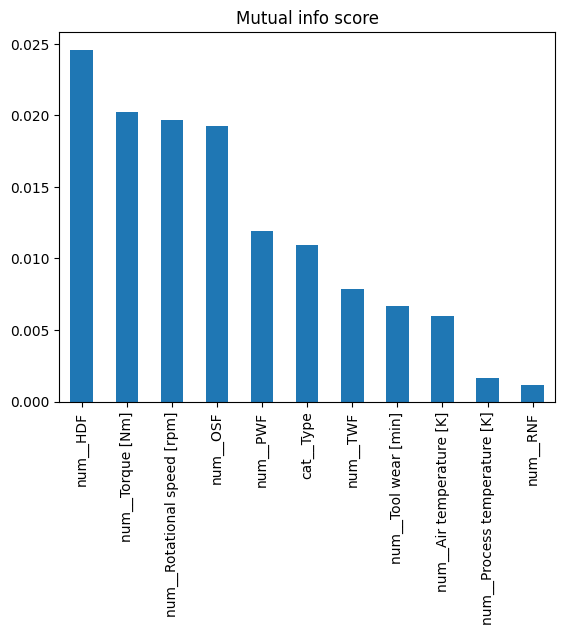

In [32]:
mc.plot(kind='bar', title='Mutual info score')

## Create a Final Pipeline with the help of OneHotEncoder

In [33]:
from sklearn.preprocessing import OneHotEncoder

In [34]:
num_pipe1 = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                            ('scaler', StandardScaler())])

cat_pipe1 = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                            ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

pre1 = ColumnTransformer([('num', num_pipe1, con),
                          ('cat', cat_pipe1, cat)]).set_output(transform='pandas')

In [36]:
X_pre1 = pre1.fit_transform(X)
X_pre1.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
0,0.395880,-0.246230,0.545416,-0.499711,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
1,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
2,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
3,0.610675,0.692284,0.026445,0.464745,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
4,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0


## Apply train test split

In [37]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre1, Y, test_size=0.2, random_state=42)

In [38]:
xtrain.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
12407,0.879169,0.547897,-0.283496,0.394175,-0.428500,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
85011,0.449579,-0.318424,-0.492526,0.358890,-0.303431,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
65292,-0.731794,-0.607197,-1.119615,1.958477,-1.210180,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
18478,0.932868,0.547897,0.163396,-0.993701,-1.382149,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
100267,-0.516999,-0.968164,0.812109,-0.876084,0.306279,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0


In [39]:
ytrain.head()

,Machine failure
12407,0
85011,0
65292,0
18478,0
100267,0


In [40]:
xtest.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
123128,0.556977,0.547897,-1.097992,2.546560,-1.444684,-0.03945,-0.072021,-0.049016,15.863363,-0.047568,0.0,1.0,0.0
54705,0.342182,0.981058,0.163396,-0.511473,1.338097,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
40016,0.395880,0.331317,-0.153753,-0.217431,0.149943,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
75025,-1.215083,-1.112551,-0.132129,-0.217431,0.400081,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
120421,0.503278,0.547897,0.134564,-0.217431,1.541334,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0


In [41]:
ytest.head()

,Machine failure
123128,1
54705,0
40016,0
75025,0
120421,0


In [42]:
xtrain.shape

(109143, 13)

In [43]:
xtest.shape

(27286, 13)

In [44]:
ytrain.shape

(109143, 1)

In [46]:
ytest.shape

(27286, 1)

## Preprocessing Completed

## Algorithm Evaluation

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [48]:
dct = {'Logistic': LogisticRegression(),
       'Decision': DecisionTreeClassifier(),
       'Random Forest': RandomForestClassifier(),
       'Gradient Boost': GradientBoostingClassifier(),}

In [49]:
dct.items()

dict_items([('Logistic', LogisticRegression()), ('Decision', DecisionTreeClassifier()), ('Random Forest', RandomForestClassifier()), ('Gradient Boost', GradientBoostingClassifier())])

## Fit the model and evaluate

In [50]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [51]:
tr = []
ts = []
tr_cv =[]

for name, model in dct.items():
    # Fit the model
    model.fit(xtrain, ytrain)
    # Predict results for train and test
    ypred_tr = model.predict(xtrain)
    ypred_ts = model.predict(xtest)
    # Calculate f1 score in train and test
    f1_tr = f1_score(ytrain, ypred_tr)
    f1_ts = f1_score(ytest, ypred_ts)
     # 5 - fold cross validation on training
    scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring='f1_macro')
    f1_cv = scores.mean()
    # Append above results in tr, ts, tr_cv
    tr.append(f1_tr)
    ts.append(f1_ts)
    tr_cv.append(f1_cv)

     # Print above results for each model
    print(f'Model name : {name}\n')
    print(f'Train F1 : {f1_tr:.4f}')
    print(f'Train F1 Cross Validated : {f1_cv:.4f}')
    print(f'Test F1 : {f1_ts:.4f}')
    print('\n=========================================================================\n')

Model name : Logistic

Train F1 : 0.8625
Train F1 Cross Validated : 0.9301
Test F1 : 0.8649


Model name : Decision

Train F1 : 0.9950
Train F1 Cross Validated : 0.8714
Test F1 : 0.7715


Model name : Random Forest

Train F1 : 0.9944
Train F1 Cross Validated : 0.9271
Test F1 : 0.8638


Model name : Gradient Boost

Train F1 : 0.8732
Train F1 Cross Validated : 0.9283
Test F1 : 0.8637




In [52]:
tr

[0.8625247851949769, 0.9950073421439061, 0.994426518040481, 0.8732394366197184]

In [53]:
ts

[0.8648648648648648,
 0.7714932126696833,
 0.8637532133676092,
 0.8636942675159236]

In [54]:
tr_cv

[0.930148826025286, 0.8713588088656831, 0.9270839723973074, 0.9282975476781165]

## Save above result in dataframe

In [55]:
result_dct = {'Model': list(dct.keys()),
              'Train_f1': tr,
              'Test_f1': ts,
              'Train_cv': tr_cv}

In [57]:
result_df = pd.DataFrame(result_dct)

In [58]:
result_df

,Model,Train_f1,Test_f1,Train_cv
0,Logistic,0.862525,0.864865,0.930149
1,Decision,0.995007,0.771493,0.871359
2,Random Forest,0.994427,0.863753,0.927084
3,Gradient Boost,0.873239,0.863694,0.928298


In [60]:
result_df.sort_values('Test_f1', ascending=False)

,Model,Train_f1,Test_f1,Train_cv
0,Logistic,0.862525,0.864865,0.930149
2,Random Forest,0.994427,0.863753,0.927084
3,Gradient Boost,0.873239,0.863694,0.928298
1,Decision,0.995007,0.771493,0.871359


## Choosing LogisticRegression model based on Highest F1 score

In [61]:
model = LogisticRegression()
model.fit(xtrain, ytrain)

LogisticRegression()

In [62]:
model.score(xtrain, ytrain)

0.9961884866642845

In [63]:
model.score(xtest, ytest)

0.9961518727552591

## Predcit the test result

In [64]:
ypred_tr1 = model.predict(xtrain)
ypred_ts1 = model.predict(xtest)

In [65]:
ypred_tr1[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [68]:
ytrain.head()

,Machine failure
12407,0
85011,0
65292,0
18478,0
100267,0


In [70]:
ypred_ts1[0:5]

array([1, 0, 0, 0, 0], dtype=int64)

In [71]:
ytest.head()

,Machine failure
123128,1
54705,0
40016,0
75025,0
120421,0


## Check the Probabilities

In [76]:
c = model.classes_
c

array([0, 1], dtype=int64)

In [72]:
yprob_tr = model.predict_proba(xtrain)
yprob_ts = model.predict_proba(xtest)

In [73]:
yprob_tr[0:5]

array([[9.95621225e-01, 4.37877504e-03],
       [9.95650457e-01, 4.34954338e-03],
       [9.95001379e-01, 4.99862144e-03],
       [9.99086681e-01, 9.13318674e-04],
       [9.98182923e-01, 1.81707750e-03]])

In [75]:
yprob_ts[0:5]

array([[0.00562545, 0.99437455],
       [0.99789579, 0.00210421],
       [0.99768523, 0.00231477],
       [0.99836701, 0.00163299],
       [0.99590762, 0.00409238]])

## Plot the confusion metrics for test

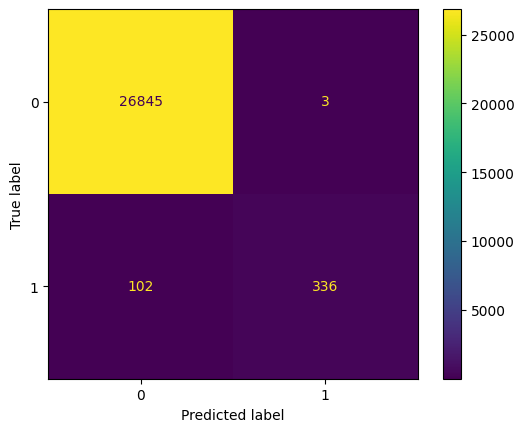

In [77]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts1)
cfd = ConfusionMatrixDisplay(cf, display_labels=c)
cfd.plot()

## Display classificatio report

In [79]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26848
           1       0.99      0.77      0.86       438

    accuracy                           1.00     27286
   macro avg       0.99      0.88      0.93     27286
weighted avg       1.00      1.00      1.00     27286



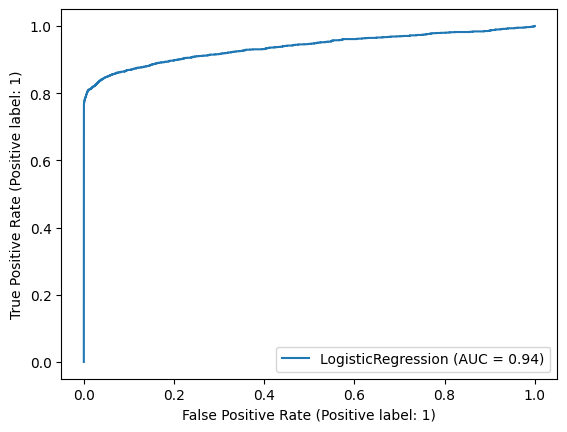

In [80]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(model, xtrain, ytrain)

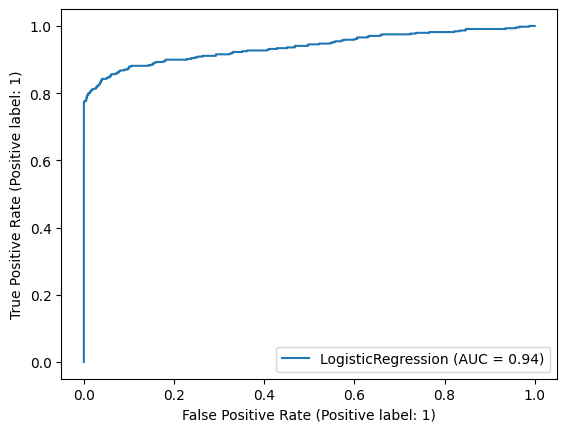

In [81]:
RocCurveDisplay.from_estimator(model, xtest, ytest)

In [82]:
auc_scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring='roc_auc')
auc_scores

array([0.94160001, 0.93028717, 0.95428148, 0.92771629, 0.92533918])

In [83]:
auc_scores.mean()

0.9358448272945527

## Predict the result from out of sample data

In [84]:
xnew = pd.read_csv('test.csv')
xnew.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [85]:
xnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90954 entries, 0 to 90953
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       90954 non-null  int64  
 1   Product ID               90954 non-null  object 
 2   Type                     90954 non-null  object 
 3   Air temperature [K]      90954 non-null  float64
 4   Process temperature [K]  90954 non-null  float64
 5   Rotational speed [rpm]   90954 non-null  int64  
 6   Torque [Nm]              90954 non-null  float64
 7   Tool wear [min]          90954 non-null  int64  
 8   TWF                      90954 non-null  int64  
 9   HDF                      90954 non-null  int64  
 10  PWF                      90954 non-null  int64  
 11  OSF                      90954 non-null  int64  
 12  RNF                      90954 non-null  int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 9.0+ MB


In [86]:
xnew.isna().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [87]:
xnew.duplicated().sum()

0

In [89]:
xnew_pre = pre1.transform(xnew)
xnew_pre.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
0,1.308759,1.125444,-0.153753,-0.276240,-0.694271,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
1,0.986567,0.764477,1.388744,-1.358313,-1.366516,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
2,0.771772,0.331317,0.033653,-0.311525,-0.131461,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
3,0.127386,-0.246230,-0.297912,0.852880,-1.554119,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
4,1.899446,1.702992,-0.038426,0.111895,0.149943,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0


In [90]:
pred = model.predict(xnew_pre)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [92]:
prob = model.predict_proba(xnew_pre)[:,1]
prob

array([0.00213785, 0.00104909, 0.00267445, ..., 0.00308065, 0.00242065,
       0.0022749 ])

In [93]:
df_final = xnew[['id']]
df_final

,id
0,136429
1,136430
2,136431
3,136432
4,136433
...,...
90949,227378
90950,227379
90951,227380
90952,227381


In [97]:
df_final['Machine failure'] = pred
df_final['Probability'] = prob

In [107]:
df_final

,id,Machine failure,Probability
0,136429,0,0.002138
1,136430,0,0.001049
2,136431,0,0.002674
3,136432,0,0.003017
4,136433,0,0.003709
...,...,...,...
90949,227378,0,0.002260
90950,227379,0,0.000445
90951,227380,0,0.003081
90952,227381,0,0.002421


## Save Above Prediction in CSV file

In [108]:
df_final.to_csv('Failure_result.csv', index=False)